## **Exemplo 1: Sistema Fuzzy Simples para Controle de Velocidade de um Ventilador**

### **Problema:**
Vamos criar um sistema fuzzy para controlar a velocidade de um ventilador com base na temperatura e umidade do ambiente.

### **Passo 1: Instalar a biblioteca `scikit-fuzzy`**
Se você ainda não tem a biblioteca instalada, execute o seguinte comando:

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### **Passo 2: Importar as bibliotecas necessárias**

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

### **Passo 3: Definir as variáveis fuzzy**


1. **Antecedentes (Entradas):**
   - Temperatura: 0 a 40 graus Celsius.
   - Umidade: 0% a 100%.

2. **Consequente (Saída):**
   - Velocidade do ventilador: 0% a 100%.

In [3]:
# Antecedentes (Entradas)
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')

# Consequente (Saída)
velocidade = ctrl.Consequent(np.arange(0, 101, 1), 'velocidade')

### **Passo 4: Definir as funções de pertinência**

In [4]:
# Funções de pertinência para Temperatura
temperatura['fria'] = fuzz.trimf(temperatura.universe, [0, 10, 20])
temperatura['morna'] = fuzz.trimf(temperatura.universe, [10, 20, 30])
temperatura['quente'] = fuzz.trimf(temperatura.universe, [20, 30, 40])

# Funções de pertinência para Umidade
umidade['baixa'] = fuzz.trimf(umidade.universe, [0, 30, 50])
umidade['media'] = fuzz.trimf(umidade.universe, [30, 50, 70])
umidade['alta'] = fuzz.trimf(umidade.universe, [50, 70, 100])

# Funções de pertinência para Velocidade
velocidade['lenta'] = fuzz.trimf(velocidade.universe, [0, 30, 50])
velocidade['media'] = fuzz.trimf(velocidade.universe, [30, 50, 70])
velocidade['rapida'] = fuzz.trimf(velocidade.universe, [50, 70, 100])

### **Passo 5: Visualizar as funções de pertinência**

/home/eltonss/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


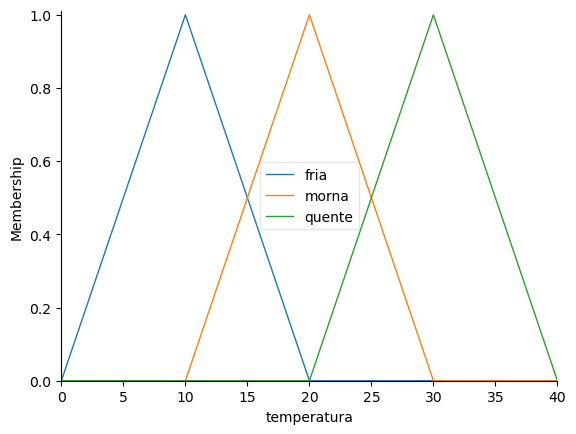

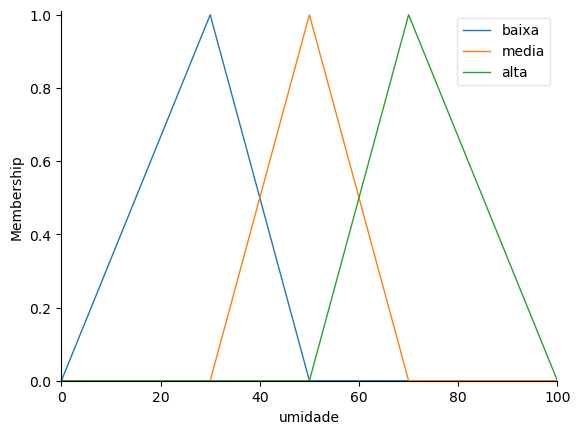

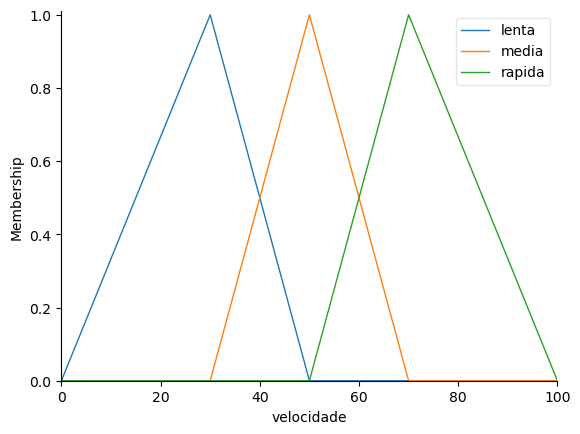

In [5]:
# Visualizar as funções de pertinência
temperatura.view()
umidade.view()
velocidade.view()
plt.show()

### **Passo 6: Criar as regras fuzzy**

In [6]:
regra1 = ctrl.Rule(temperatura['fria'] & umidade['baixa'], velocidade['lenta'])
regra2 = ctrl.Rule(temperatura['morna'] & umidade['media'], velocidade['media'])
regra3 = ctrl.Rule(temperatura['quente'] & umidade['alta'], velocidade['rapida'])

### **Passo 7: Criar o sistema de controle fuzzy**

In [7]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

### **Passo 8: Simular o sistema com entradas específicas**

In [9]:
# Definir entradas
sistema.input['temperatura'] = 25
sistema.input['umidade'] = 60

# Computar o sistema
sistema.compute()

### **Passo 9: Obter e visualizar a saída**

Velocidade do ventilador: 63.84%


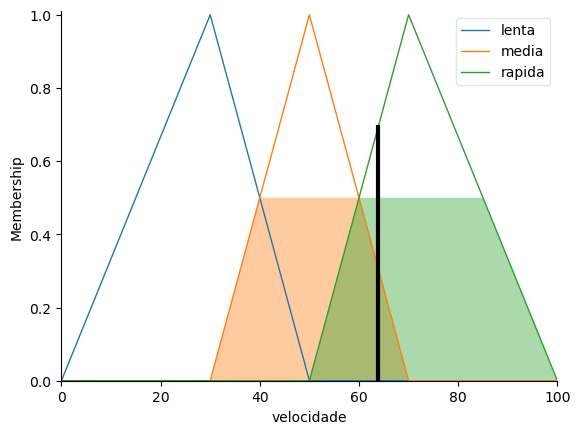

In [10]:
# Saída (velocidade do ventilador)
print(f"Velocidade do ventilador: {sistema.output['velocidade']:.2f}%")

# Visualizar o resultado
velocidade.view(sim=sistema)
plt.show()

#### **Interpretação:**
- **"Velocidade do ventilador: 63.84%"**:
  - Indica que, com as entradas fornecidas (temperatura e umidade), o sistema fuzzy calculou que a velocidade ideal do ventilador é **63.84%**.

- **Eixo X (velocidade):**
  - Representa a velocidade do ventilador, variando de **0% a 100%**.

- **Eixo Y (Membership):**
  - Representa o **grau de pertinência** (entre 0 e 1) da velocidade em cada categoria fuzzy: "lenta", "média" e "rápida".

- **Curvas de Pertinência:**
  - **"Lenta":** Pertinência mais alta para velocidades baixas (0% a 50%).
  - **"Média":** Pertinência mais alta para velocidades intermediárias (30% a 70%).
  - **"Rápida":** Pertinência mais alta para velocidades altas (50% a 100%).

- **Linha Vertical em 63.84%:**
  - Mostra o ponto onde a velocidade calculada (63.84%) se encaixa nas categorias fuzzy.
  - Nesse caso, a velocidade está mais próxima da categoria **"rápida"**, mas ainda com uma influência significativa da categoria **"média"**.

- O sistema fuzzy determinou que, dadas as condições de temperatura e umidade, a velocidade ideal do ventilador é **63.84%**.
- Isso significa que o ventilador deve operar em uma velocidade **moderadamente alta**, quase atingindo a categoria "rápida".
- A pertinência da velocidade em cada categoria mostra que:
  - A categoria **"rápida"** tem a maior influência.
  - A categoria **"média"** ainda tem uma influência considerável.
  - A categoria **"lenta"** tem pouca ou nenhuma influência.


#### **Conclusão:**
O sistema fuzzy está funcionando corretamente, ajustando a velocidade do ventilador de forma suave e contínua. O valor de **63.84%** indica que o ventilador deve operar em uma velocidade mais alta, mas ainda dentro de uma faixa segura e eficiente.




---

## **Exemplo 2: Sistema Fuzzy para Estacionamento de Carro**

### **Problema:**
Vamos criar um sistema fuzzy para ajudar um carro a estacionar com base na distância da parede e no ângulo de direção.

### **Passo 1: Definir as variáveis fuzzy**

In [11]:
# Antecedentes (Entradas)
distancia = ctrl.Antecedent(np.arange(0, 101, 1), 'distancia')
angulo = ctrl.Antecedent(np.arange(-90, 91, 1), 'angulo')

# Consequente (Saída)
direcao = ctrl.Consequent(np.arange(-50, 51, 1), 'direcao')

### **Passo 2: Definir as funções de pertinência**

In [12]:
# Funções de pertinência para Distância
distancia['perto'] = fuzz.trimf(distancia.universe, [0, 0, 50])
distancia['medio'] = fuzz.trimf(distancia.universe, [0, 50, 100])
distancia['longe'] = fuzz.trimf(distancia.universe, [50, 100, 100])

# Funções de pertinência para Ângulo
angulo['esquerda'] = fuzz.trimf(angulo.universe, [-90, -90, 0])
angulo['centro'] = fuzz.trimf(angulo.universe, [-45, 0, 45])
angulo['direita'] = fuzz.trimf(angulo.universe, [0, 90, 90])

# Funções de pertinência para Direção
direcao['esquerda'] = fuzz.trimf(direcao.universe, [-50, -50, 0])
direcao['centro'] = fuzz.trimf(direcao.universe, [-25, 0, 25])
direcao['direita'] = fuzz.trimf(direcao.universe, [0, 50, 50])

### **Passo 3: Criar as regras fuzzy**

In [13]:
# Regras fuzzy
regra1 = ctrl.Rule(distancia['perto'] & angulo['esquerda'], direcao['direita'])
regra2 = ctrl.Rule(distancia['medio'] & angulo['centro'], direcao['centro'])
regra3 = ctrl.Rule(distancia['longe'] & angulo['direita'], direcao['esquerda'])

### **Passo 4: Simular o sistema**

Direção do carro: 14.54 graus


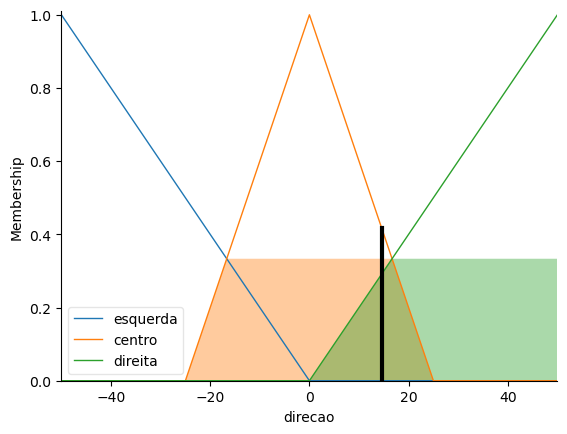

In [14]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

# Definir entradas
sistema.input['distancia'] = 30
sistema.input['angulo'] = -30

# Computar o sistema
sistema.compute()

# Saída (direção)
print(f"Direção do carro: {sistema.output['direcao']:.2f} graus")

# Visualizar o resultado
direcao.view(sim=sistema)
plt.show()

#### **Interpretação:**

- **"Direção do carro: 14.54 graus"**:
  - Indica que, com as entradas fornecidas (distância da parede e ângulo de direção), o sistema fuzzy calculou que o carro deve ajustar sua direção em **14.54 graus**.

- **Eixo X (direção):**
  - Representa a direção do carro, variando de **-50 graus (esquerda)** a **50 graus (direita)**.

- **Eixo Y (Membership):**
  - Representa o **grau de pertinência** (entre 0 e 1) da direção em cada categoria fuzzy: "esquerda", "centro" e "direita".

- **Curvas de Pertinência:**
  - **"Esquerda":** Pertinência mais alta para direções negativas (esquerda).
  - **"Centro":** Pertinência mais alta para direções próximas de zero (centro).
  - **"Direita":** Pertinência mais alta para direções positivas (direita).

- **Linha Vertical em 14.54 graus:**
  - Mostra o ponto onde a direção calculada (14.54 graus) se encaixa nas categorias fuzzy.
  - Nesse caso, a direção está mais próxima da categoria **"direita"**, mas ainda com uma influência significativa da categoria **"centro"**.

- O sistema fuzzy determinou que, dadas as condições de distância da parede e ângulo de direção, o carro deve ajustar sua direção em **14.54 graus para a direita**.
- Isso significa que o carro deve fazer uma correção **moderada** para a direita para se alinhar corretamente.
- A pertinência da direção em cada categoria mostra que:
  - A categoria **"direita"** tem a maior influência.
  - A categoria **"centro"** ainda tem uma influência considerável.
  - A categoria **"esquerda"** tem pouca ou nenhuma influência.
